Przykład 3
======
Mamy dwia zbiory danych: czas, jaki na stronie spędzili (F)raudsterzy i prawdziwi (C)lienci. Czy mamy do czynienia z dwoma procesami? Innymi słowy, czy dystrybucje, które generują te dane są różne?

Zaczynamy od wczytania i narysowania histogramów danych.

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [7]:
dane = np.load("example3_data.npz")
print(dane.files)

['clients', 'frauds']


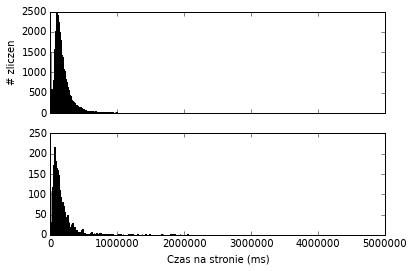

In [14]:
clients = dane['clients']
frauds = dane['frauds']
fig, (ax1, ax2) = plt.subplots(2, sharex=True);
n, b, p = ax1.hist(clients, bins=500);
ax2.hist(frauds, bins=b);
ax2.set_xlabel("Czas na stronie (ms)");
ax1.set_ylabel(u"# zliczen");

Na oko się różnią. Czy można to jakoś sprawdzić? Można skorzystać metodologii testowania hipotez statystycznych (podobnie jak w przykładzie 1). Wpierw zakładamy, że dane pochodzą z tej samej dystrybucji. Liczymu prawdopodobieństwo otrzymania jakiejś statystyki (na przykład różnicy średnich, median...) przy tym założeniu. Jeśli to prawdopodobieństwo jest małe, to przyjmujemy, że założona hipoteza jest nieprawdziwa. W tym przypadku, że dane pochodzą z różnych dystrybucji.

Moduł `scipy.stats` dostarcza całkiem sporej liczby testów, które wykonują powyższą procedurę za nas. Jednym z nich jest test Manna-Whiteneya.

In [17]:
result = ss.mannwhitneyu(frauds, clients)
print(result)

(64124991.0, 4.7101775814124725e-51)


Pierwsza wielkość, to wartość statystyki testu, druga to prawdopodobieństo otrzymania tej statystkyki, zakładając hipotezę, że dane pochodzą z tej samej dystrybucji.

To samo można zrobić samemu, znowu korzystająć z metody bootstrap. Wpierw liczymy statystykę początkową rozkładów. Niech to będzie różnica median. Łączymy oba wektory w jeden (łączymy dystrybucje; przecież i tak zakładamy, że są takie same) i losujemy, ze zwracaniem, dwa nowe wektory. Pierwszy ma długość wektora klientów, drugi ma długość wektora fraudsterów. Liczymy statystykę tych dwóch, nowych wektorów. Tą procedurę powtarzamy `n_rep` razy.

Wynikiem tej metody jest wektor statystyk wyznaczonych przy zadanej hipotezie zerowej. Spodziewamy się, że jeśli to rzeczywiście są dane z tego samego rozkładu, to statystyka, którą wyliczyliśmy na samym początku, nie będzie niczym niezwykłym. Liczymy więc prawdopodobieństwo otrzymania takiej, lub większej statystki z bootstapowanego wektora.

In [20]:
Nf = len(frauds)
Nc = len(clients)
n_rep = 1000
init_stat = np.abs(np.median(frauds) - np.median(clients))
stats = np.zeros(n_rep)
big_vector = np.concatenate((frauds, clients))
N = len(big_vector)
for i in range(n_rep):
    new_frauds = np.random.choice(big_vector, Nf, replace=True)
    new_clients = np.random.choice(big_vector, Nc, replace=True)
    stats[i] = np.abs(np.median(new_frauds) - np.median(new_clients))
pval = np.sum(stats >= init_stat)/n_rep
print(pval)


0.0


Zerowa wielkość `pval` oznacza, że morzemy odrzucić hipotezę zerową.